In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import re
import sqlite3
from collections import Counter

def messagesperday(dataframe):
    messagesperday = dataframe.resample('D').count()
    fig = plt.figure(figsize=(100,50))
    ax = fig.add_subplot(111)
    plt.title('Meddelanden per dag', size=16)
    messagesperday['id'].plot()
    plt.xlabel('Datum')
    plt.ylabel('Meddelanden')
    #novelfilename = str(time.time())
    #plt.savefig("../results/" + str(novelfilename) + "perday.png")
    #return(str(novelfilename))
    plt.show()

def messagesperhour(dataframe):
    hours = dataframe.index.hour
    hours.mean()
    fig = plt.figure(figsize=(30,15))
    ax = fig.add_subplot(111)
    plt.title('Meddelanden per timme', size=16)
    plt.plot(hours, 'ro') #Plot each individual message per day
    plt.xlabel('Meddelande')
    plt.ylabel('Klockslag')
    #novelfilename = str(time.time())
    plt.show()
    #plt.savefig("../results/" + str(novelfilename) + "perhour.png")
    #return(str(novelfilename))

def makementionsnetwork(dataframe):
    G = nx.DiGraph()
    for tweet in dataframe.iterrows():
        match = re.findall("(?<=@).*?(?=[\s|\:])", tweet[1][4], re.IGNORECASE)
        if match:
            for m in match:
                #print("Source: " + tweet[1][2])
                #print("Target: " + m)
                G.add_edge(tweet[1][2], m)
    nx.write_gexf(G, "porrbotmentionsnetwork.gexf")
    
def hashtaganalyser(dataframe):
    hashtaglist = []
    for tweet in dataframe.iterrows():
        match = re.findall("(?<=#).*?(?=[\s|\:])", tweet[1][4], re.IGNORECASE)
        if match:
            for m in match:
                hashtaglist.append("#" + m)
    return(hashtaglist)

def urlanalyser(dataframe):
    urllist = []
    for tweet in dataframe.iterrows():
        match = re.findall("(?<=http).*?(?=[\s])", tweet[1][4], re.IGNORECASE)
        if match:
            for m in match:
                urllist.append(m)
    return(urllist)
    
        
def search(df, regexp):
    results = []
    for d in df.iterrows():
        searchexp = re.findall(regexp, d[1][5], re.IGNORECASE)
        if searchexp:
            for s in searchexp:
                results.append(("https://twitter.com/user/status/" + str(d[1][1]), d[1][5]))
    return results


In [2]:
conn = sqlite3.connect("porrtweets.sqlite3")
sql = "SELECT * FROM users;"
df = pd.read_sql_query(sql, conn)
pd.created_at = pd.to_datetime(df.timestamp, format='%Y-%m-%d %H:%M:%S')
df.index = pd.created_at

In [3]:
df.head()

id             tweetid             user  \
timestamp                                                      
2018-01-07 08:43:06   1  949924340186931200    VeritasPharma   
2018-01-13 03:12:04   2  952015363205681152  SmthnglikeKites   
2018-01-13 05:56:23   3  952056711963140097      itstimwhite   
2014-05-06 20:08:11   4  463772234331353088         jkell150   
2014-06-09 13:26:44   5  475992390298525698         jkell150   

                               timestamp  \
timestamp                                  
2018-01-07 08:43:06  2018-01-07 08:43:06   
2018-01-13 03:12:04  2018-01-13 03:12:04   
2018-01-13 05:56:23  2018-01-13 05:56:23   
2014-05-06 20:08:11  2014-05-06 20:08:11   
2014-06-09 13:26:44  2014-06-09 13:26:44   

                                                                  text  
timestamp                                                               
2018-01-07 08:43:06  @personperson923 what do you think is going to...  
2018-01-13 03:12:04  @FoxSeeOne @Ness_Divad18 @personperson923 @Sub...  
2018-01-13 05:56:23  @personperson923 thanksss for following \nwoul...  
2014-05-06 20:08:11  Pretty dam good week so far and gonna be a goo...  
2014-06-09 13:26:44  Pretty damn good weekend with @TrishaKellogg @...

In [19]:
messagesperday(df)

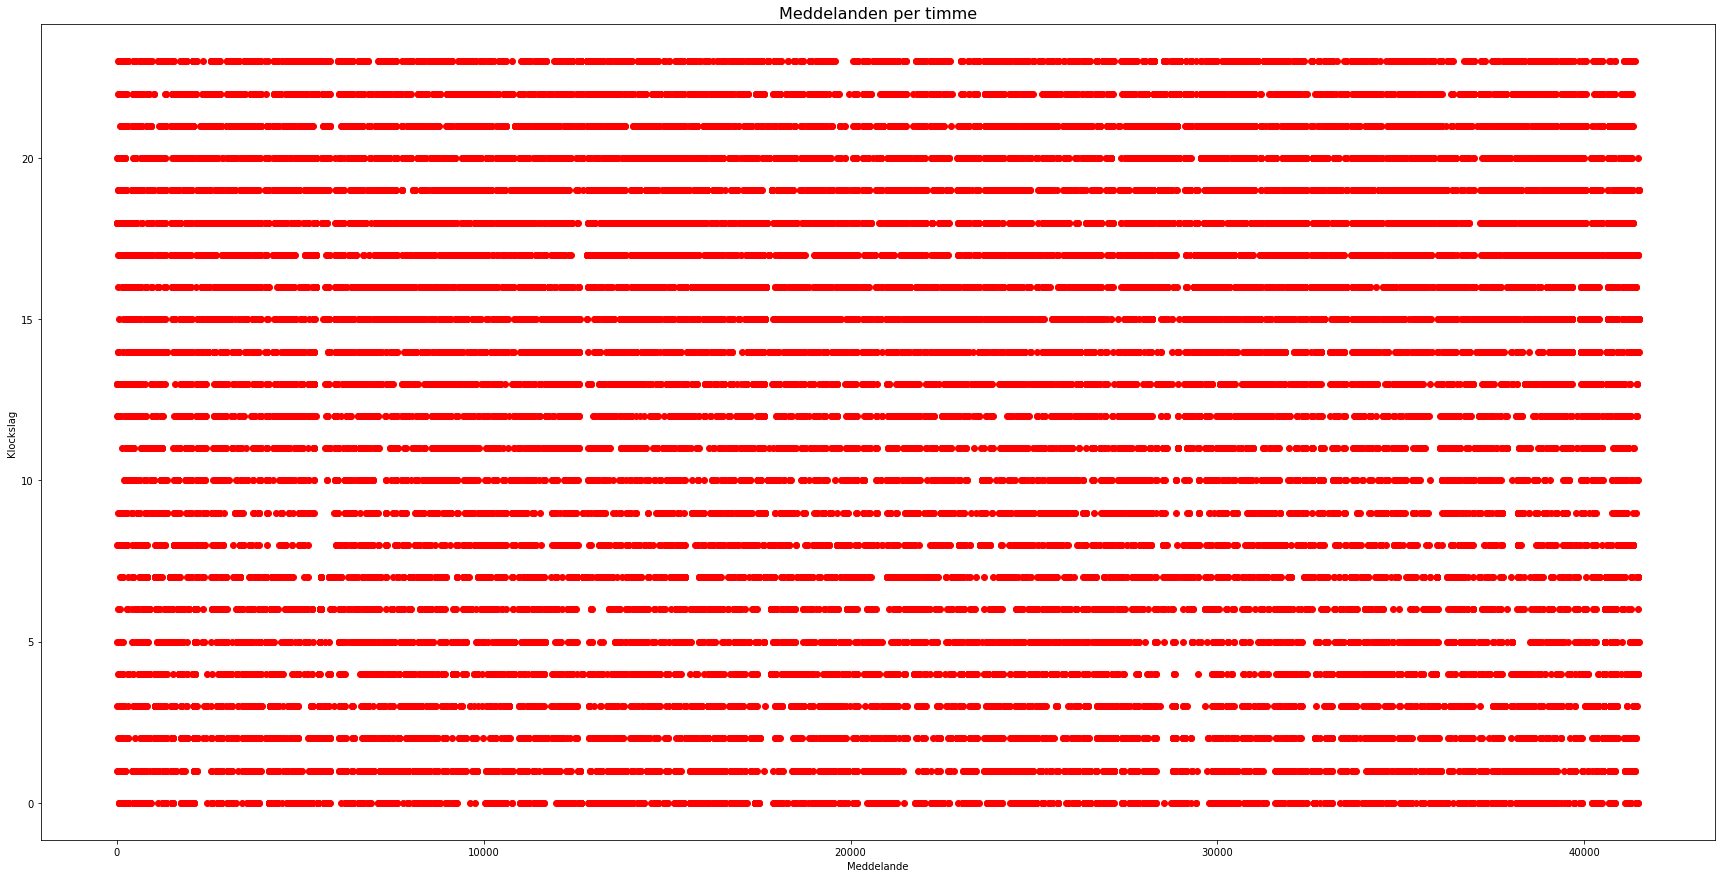

In [12]:
messagesperhour(df)

In [20]:
makementionsnetwork(df)

In [12]:
len(hashtaganalyser(df))

10082

In [22]:
hashfreq = Counter(hashtaganalyser(df)).most_common(30)

In [23]:
for f in hashfreq:
    print(f)

('#FF', 195)
('#androidgames,', 87)
('#android,', 74)
('#mipuntodevista', 71)
('#paranormaali', 70)
('#ELEVATE', 59)
('#haamuveljet', 56)
('#マブラヴSF', 56)
('#SmurfsVillage', 46)
('#partytour', 42)
('#SAMCoventry', 39)
('#Forex', 38)
('#YoVeoJcTvs', 35)
('#CSRRacing', 34)
('#デモンズキッチン', 34)
('#ごち娘', 34)
('#Suomi', 30)
('#ff', 29)
('#Rayito', 28)
('#VM', 28)
('#fashion', 27)
('#listing', 25)
('#TuitUtilhttp', 25)
('#1', 25)
('#', 25)
('#Maria', 23)
('#rockhardweekend', 23)
('#Casino', 23)
('#disneyworld', 22)
('#tlcesports', 22)


In [5]:
urlfreq = Counter(urlanalyser(df)).most_common(30)

In [6]:
for url in urlfreq:
    print("http" + url[0])
    #print("http" + url[0], url[1])

http://bnent.jp/optc-den2e/
http://ow.ly/7wAx30h5FET
http://uapp.ly
http://bit.ly/AzhyKP
http://bit.ly/NtcNTs
http://fllwrs.com
http://www.euroboys.com
http://www.elevate-apparel.com
http://www.dmm.com/netgame/feature/muv-luv.html
http://ow.ly/KhNqp
http://bit.ly/qgi0WR
http://gigam.es/mtw_Tribez
http://bit.ly/24qQV7d
https://t.lnk.to/spTw
http://nmgam.es/crgt
http://3step.me/3bjm
http://www.abadboy.com
http://www.tuitutil.net
http://refer.helixstudios.net/track/euroboys.3.9.9.0.0.0.0.0
http://bit.ly/ReliveThePassion
http://bit.ly/DiskreDate
http://hurricanes.wral.com/
https://www.trendjamz.com.ng/2017/12/23/olaski-emajekojonan-assignment-cover/
http://gigam.es/etw_Tribez
http://twitcam.livestream.com/cgt7d
http://youtu.be/KxnLz1qbEPA?a
https://www.ebay.co.uk/ulk/itm/222793594358
http://twitcam.livestream.com/8h985
http://bit.ly/2mfeBZu
https://play.google.com/store/apps/details?id=com.tenpercentred.biotix&hl=en


In [3]:
len(urlanalyser(df))

10710